**<span style="color:red">Namn och CID p√• gruppmedlemmar: </span>**

Philip Kappel Cursaz, cursaz

Joel Sj√∂sten Johannesson, joelsjos

Alfred Gustavsson Svedenbj√∂rk, alfgus

In [9]:
import numpy as np
from numpy.matlib import repmat # Vi l√•nar funktionen repmat fr√•n matlib
from scipy import constants # Scipy constants inneh√•ller alla m√∂jliga fysikaliska konstanter
c = constants.speed_of_light # Vi anv√§nder det f√∂r att importera ljusets hastighet
import matplotlib.pyplot as plt
plt.style.use("ggplot")


In [10]:
# Funktioner f√∂r HUPP:en

def xy_source(N, D_star, seperation):
    '''
        
    N:          Antalet observationspunkter (punkter l√§ngs u-axeln d√§r f√§ltet ber√§knas)
    D_star:     Stj√§rnans diameter [m]
    separation: Avst√•nd mellan punktk√§llorna p√• stj√§rnan [m],
                kan l√§mpligen anges som br√•kdel av D_star, 
                t.ex. separation=D_star/30
        
    x: matris med punktk√§llornas x-positioner [m] 
    y: matris med punktk√§llornas y-positioner [m]
    M: punktk√§llornas antal
    
    '''

    x = np.arange(-D_star/2, D_star/2 + seperation, seperation) # Vektor med k√§llpunkter i x-led
    y = x                                                       # och i y-led
    
    X, Y = np.meshgrid(x, y)                                    
    R    = np.sqrt(X**2 + Y**2)                                 # L√§ngd fr√•n origo till k√§llpunkter
    
    element_inuti_diameter = R < (D_star/2)                     # Element innanf√∂r D_star

    x = X[element_inuti_diameter]                               # Plocka ut x-koordinater som √§r innanf√∂r D_star
    y = Y[element_inuti_diameter]                               # och plocka ut y-koordinater

    M = np.sum(element_inuti_diameter)                          # Totalt antal k√§llor innanf√∂r D_star
    
    return (x, y, M)

def plot_xy_source(x ,y, M):
    '''
    Skapar en figur som visar hur xy-source √§r placerade

    '''
    theta = np.linspace(0, 2*np.pi, 100)                      # Rita en cirkel med diameter D_star
    x_circumference = D_star/2*np.cos(theta)
    y_circumference = D_star/2*np.sin(theta)
    
    
    miljon_km = 1e6*1e3                                       # Skala om axlar till miljoner km
    
    x_miljon_km = x/miljon_km
    y_miljon_km = y/miljon_km
    
    x_circumference_miljon_km = x_circumference/miljon_km
    y_circumference_miljon_km = y_circumference/miljon_km
    
    plt.figure()
    plt.axis('equal')
    
    plt.plot(x_circumference_miljon_km, y_circumference_miljon_km, 'black')
    plt.plot(x_miljon_km, y_miljon_km, 'ro', markersize=1.4)
    
    plt.title(r'K√§llpositioner p√• stj√§rna. Antal k√§llor M = ' + str(M))
    plt.xlabel('x [miljoner km]')
    plt.ylabel('y [miljoner km]')

# Uppgift a

#### Ber√§kna korrelationen $Œì_{AB}(ùë¢)$ f√∂r positioner hos punkt $B$ fr√•n $ùë¢=0$ upp till $ùë¢=20$ meter.

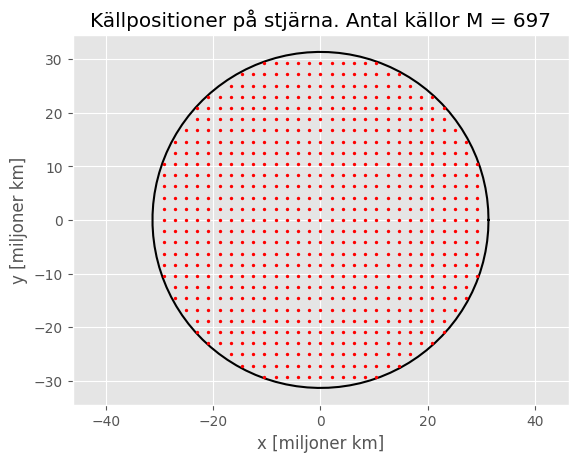

In [11]:
#%% Definiera variabler och generera k√§llor %%#

sek_per_ar = 365.24*24*60*60                            # Sekunder p√• ett √•r
L_70  = 70*sek_per_ar*c                                 # 70 ljus√•r  [m]
L_300 = 300*sek_per_ar*c                                # 300 ljus√•r [m]

lam0  = 650e-9                                          # V√•gl√§ngd [m]
k0    = 2*np.pi/lam0                                    # V√•gtal   [1/m]

### Genererar k√§llor fr√•n stj√§rna ###
D_sol         = 1392700e3
D_star        = 45*D_sol                                # Stj√§rnas diameter [m]
separation    = D_star/30                               # Separation mellan k√§llor p√• stj√§rna

N = 500                                                 # Punkter l√§ngs u-axeln
x, y, M = xy_source(N, D_star, separation)              # Generera x och y positioner f√∂r k√§llor
plot_xy_source(x ,y, M)                                 # Plotta stj√§rna med k√§llor

### Punkter som observeras ###
u = np.linspace(0, 20, N)   
u = u.reshape(N, 1)                                     # Reshape till kolonvektor

### Skapa repeterade matriser f√∂r att undvika loopar ###
x_repeterad = repmat(x, N, 1)
y_repeterad = repmat(y, N, 1)                      
u_repeterad = repmat(u, 1, M)  

### Distans till observations punkter ###
r = -(x_repeterad * u_repeterad) / L_70                                                 # Ledning finns i HUPP-beskrivning 

#%% Summera koherenstider %##
### Initiera variabler ###
gamma   = 0                # Korrelation <E(0,0)conj(E(u,0))>
I_tot   = 0                # Tidsmedelv√§rdesbildad intensitet
gamma_I = 0                # Intensitetskorrelation <I(0,0)conj(I(u,0))>

### Loopa √∂ver w koherenstider ###
iterationer = 1000          # Antal iterationer/koherenstider. Anv√§nda >200 minst!
for i in range(iterationer):
    ### Generera slumpm√§ssig fas ###
    fas           = 2*np.pi*np.random.rand(M, 1)
    fas_repeterad = np.transpose(repmat(fas, 1, N))
    
    ### Observerade v√§rden ###
    E_k_obs       = np.exp(1j * (fas_repeterad + k0 * r))        # Given i HUPP-beskrivning
    E_obs         = np.sum(E_k_obs , 1)        # Given i HUPP-beskrivning
    inst_produkt  = E_obs[0] * np.conj(E_obs)        # Given i HUPP-beskrivning
    
    gamma         += inst_produkt        # E-f√§ltets korrelation (amplitud o fas), summera inst_produkt i varje iteration!
    I_tot         += np.abs(E_obs)**2        # Tidsmedelv√§rdesbildad intensitet, summera np.abs(E_obs)**2 √∂ver alla koherenstider
    gamma_I       += (np.abs(E_obs[0])**2) * (np.abs(E_obs)**2)        # Intensitetskorrelation, samma som Gamma fast med I = np.abs(E_obs(1))**2 och np.abs(E_obs)**2

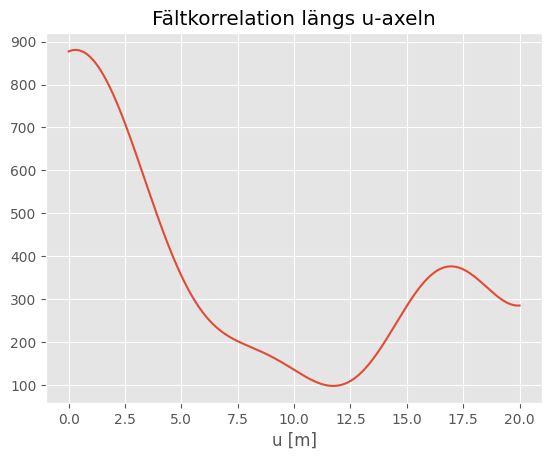

In [12]:
I_obs_inst = np.abs(E_obs)**2

plt.figure()
plt.plot(u.flatten(), np.real(I_obs_inst))
plt.xlabel('u [m]')
plt.title('F√§ltkorrelation l√§ngs u-axeln')
plt.grid(True)
plt.show()

Text(0, 0.5, '|\\Gamma_{I}| [arb. unit]')

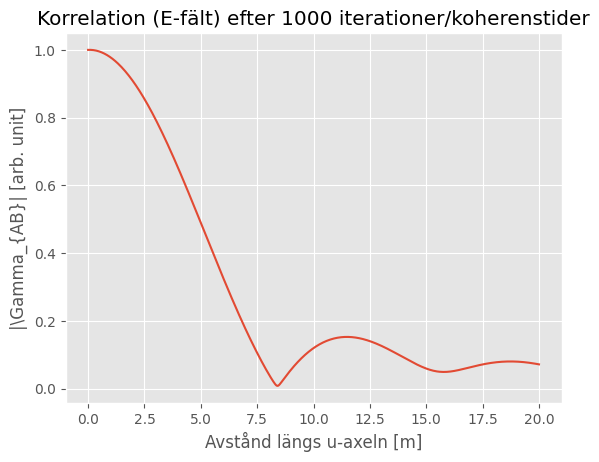

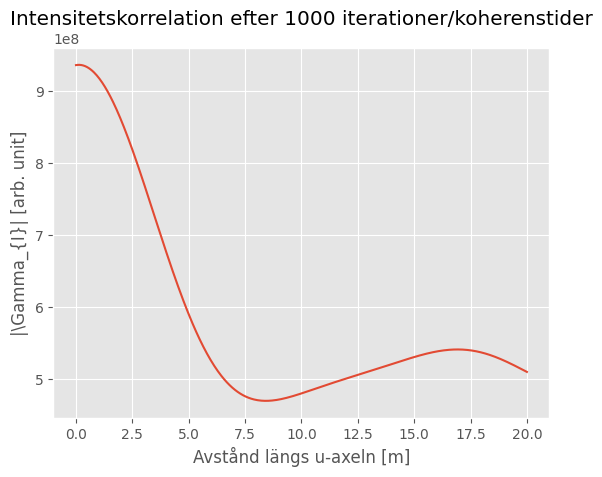

In [13]:
gamma_norm = np.abs(gamma/np.max(gamma))

plt.figure()
plt.plot(u, gamma_norm)
plt.title(r'Korrelation (E-f√§lt) efter ' + str(iterationer) + ' iterationer/koherenstider')
plt.xlabel (r'Avst√•nd l√§ngs u-axeln [m]')
plt.ylabel(r'|\Gamma_{AB}| [arb. unit]')

gamma_I_norm = np.abs(gamma_I/np.max(gamma_I))

plt.figure()
plt.plot(u, gamma_I)
plt.title('Intensitetskorrelation efter ' + str(iterationer) + ' iterationer/koherenstider' )
plt.xlabel ('Avst√•nd l√§ngs u-axeln [m]')
plt.ylabel('|\Gamma_{I}| [arb. unit]')

# Uppgift b

####  Som en ‚Äùsanity check‚Äù, ber√§kna ocks√• intensiteten, i vanlig mening, i observationspunkterna (s√•n√§r som p√• en ointressant konstant).

(0.0, 1.1)

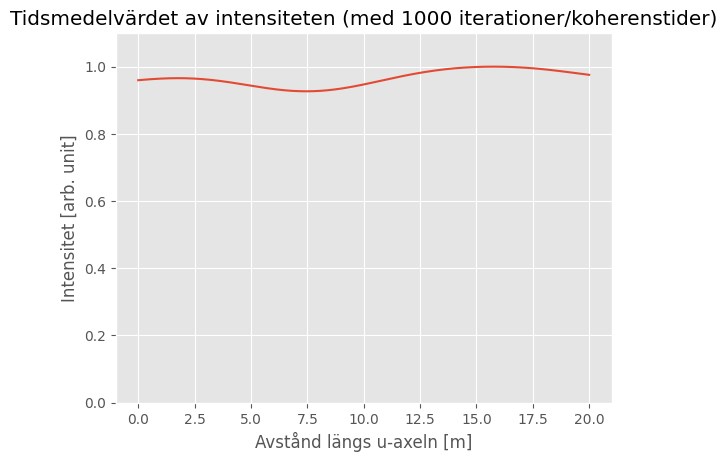

In [14]:
I_tot_norm = np.abs(I_tot/np.max(I_tot))

plt.figure()
plt.plot(u, I_tot_norm)
plt.title('Tidsmedelv√§rdet av intensiteten (med ' + str(iterationer) + ' iterationer/koherenstider)' )
plt.xlabel ('Avst√•nd l√§ngs u-axeln [m]')
plt.ylabel('Intensitet [arb. unit]')

plt.ylim([0, 1.1])

#### **√Ñr intensitetens variation l√§ngs $u$-axeln vad du f√∂rv√§ntar dig?**

Ja, eftersom vi har ett s√• stort antal oberoende punktk√§llor med slumpm√§ssiga faser s√• borde tidsmedelv√§rdet av intensiteten bli n√§stan konstant. 

# Uppgift c

#### Kolla att du samplat punktk√§llorna tillr√§ckligt t√§tt f√∂r att representera stj√§rnan p√• ett bra s√§tt. G√∂r detta genom att kolla att du f√•r liknande resultat som i **(a)** √§ven om du anv√§nder ett v√§sentligt annorlunda antal punktk√§llor.

In [15]:
#Kopierar koden fr√•n uppgift a) men √∂kar antalet punktk√§llor genom att minska separation (vi har D_star/60 ist√§llet f√∂r D_star/30).

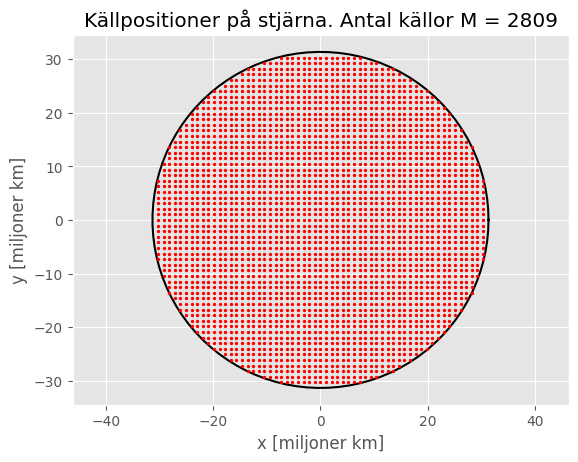

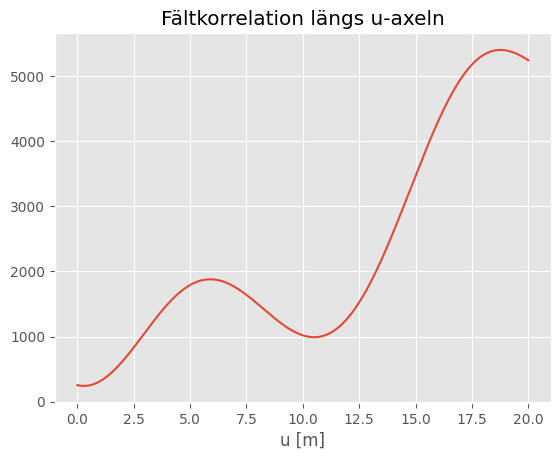

Text(0, 0.5, '|\\Gamma_{I}| [arb. unit]')

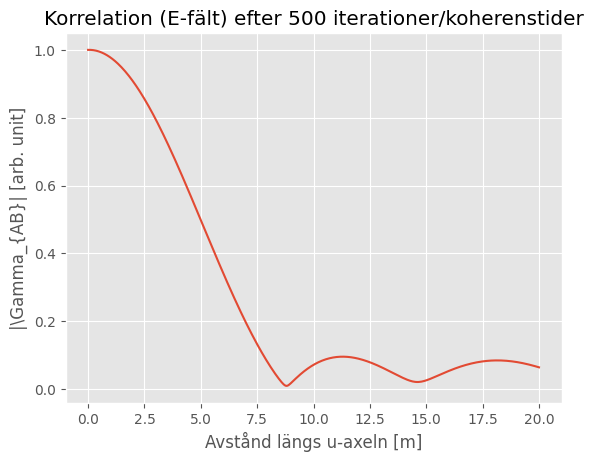

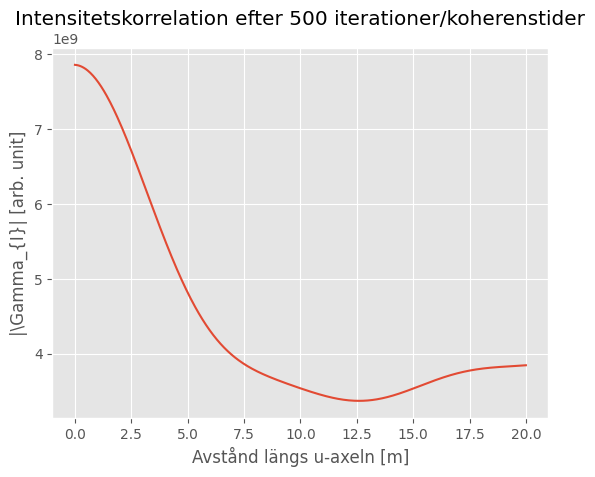

In [16]:
#%% Definiera variabler och generera k√§llor %%#

sek_per_ar = 365.24*24*60*60                            # Sekunder p√• ett √•r
L_70  = 70*sek_per_ar*c                                 # 70 ljus√•r  [m]
L_300 = 300*sek_per_ar*c                                # 300 ljus√•r [m]

lam0  = 650e-9                                          # V√•gl√§ngd [m]
k0    = 2*np.pi/lam0                                    # V√•gtal   [1/m]

### Genererar k√§llor fr√•n stj√§rna ###
D_sol         = 1392700e3
D_star        = 45*D_sol                                # Stj√§rnas diameter [m]
separation    = D_star/60                               # H√ÑR HAR VI √ÑNDRAT

N = 500                                                 # Punkter l√§ngs u-axeln
x, y, M = xy_source(N, D_star, separation)              # Generera x och y positioner f√∂r k√§llor
plot_xy_source(x ,y, M)                                 # Plotta stj√§rna med k√§llor

### Punkter som observeras ###
u = np.linspace(0, 20, N)   
u = u.reshape(N, 1)                                     # Reshape till kolonvektor

### Skapa repeterade matriser f√∂r att undvika loopar ###
x_repeterad = repmat(x, N, 1)
y_repeterad = repmat(y, N, 1)                      
u_repeterad = repmat(u, 1, M)  

### Distans till observations punkter ###
r = -(x_repeterad * u_repeterad) / L_70                                                 # Ledning finns i HUPP-beskrivning 

#%% Summera koherenstider %##
### Initiera variabler ###
gamma   = 0                # Korrelation <E(0,0)conj(E(u,0))>
I_tot   = 0                # Tidsmedelv√§rdesbildad intensitet
gamma_I = 0                # Intensitetskorrelation <I(0,0)conj(I(u,0))>

### Loopa √∂ver w koherenstider ###
iterationer = 500          # Antal iterationer/koherenstider. Anv√§nda >200 minst!
for i in range(iterationer):
    ### Generera slumpm√§ssig fas ###
    fas           = 2*np.pi*np.random.rand(M, 1)
    fas_repeterad = np.transpose(repmat(fas, 1, N))
    
    ### Observerade v√§rden ###
    E_k_obs       = np.exp(1j * (fas_repeterad + k0 * r))        # Given i HUPP-beskrivning
    E_obs         = np.sum(E_k_obs , 1)        # Given i HUPP-beskrivning
    inst_produkt  = E_obs[0] * np.conj(E_obs)        # Given i HUPP-beskrivning
    
    gamma         += inst_produkt        # E-f√§ltets korrelation (amplitud o fas), summera inst_produkt i varje iteration!
    I_tot         += np.abs(E_obs)**2        # Tidsmedelv√§rdesbildad intensitet, summera np.abs(E_obs)**2 √∂ver alla koherenstider
    gamma_I       += (np.abs(E_obs[0])**2) * (np.abs(E_obs)**2)        # Intensitetskorrelation, samma som Gamma fast med I = np.abs(E_obs(1))**2 och np.abs(E_obs)**2

I_obs_inst = np.abs(E_obs)**2

plt.figure()
plt.plot(u.flatten(), np.real(I_obs_inst))
plt.xlabel('u [m]')
plt.title('F√§ltkorrelation l√§ngs u-axeln')
plt.grid(True)
plt.show()

gamma_norm = np.abs(gamma/np.max(gamma))

plt.figure()
plt.plot(u, gamma_norm)
plt.title(r'Korrelation (E-f√§lt) efter ' + str(iterationer) + ' iterationer/koherenstider')
plt.xlabel (r'Avst√•nd l√§ngs u-axeln [m]')
plt.ylabel(r'|\Gamma_{AB}| [arb. unit]')

gamma_I_norm = np.abs(gamma_I/np.max(gamma_I))

plt.figure()
plt.plot(u, gamma_I)
plt.title('Intensitetskorrelation efter ' + str(iterationer) + ' iterationer/koherenstider' )
plt.xlabel ('Avst√•nd l√§ngs u-axeln [m]')
plt.ylabel('|\Gamma_{I}| [arb. unit]')

F√§ltkorrelationen blir ganska annorlunda, men √§r fortfarande mjuk och inte taggig p√• n√•got s√§tt. Resten av resultaten ser typ samma ut trots att vi har fler √§n fyra g√•nger s√• m√•nga punkter som i a). 

# Uppgift d

#### Om spatiella koherensl√§ngden $ùëô_ùë†$ i detta specialfall (d.v.s. cirkul√§r inkoherent ljusk√§lla) mer precist definieras som avst√•ndet mellan tv√• punkter p√• $u$-axeln d√• korrelationen mellan deras f√§lt blir noll (f√∂rsta nollst√§llet), vad ger din simulering att $const$ har f√∂r v√§rde i formeln: $$l_s = const \frac{\lambda}{D_{k√§lla}} L$$

#### Testa ocks√• ett annat v√§rde p√• diametern hos ljusk√§llan, $D_{k√§lla}$ f√∂r att bekr√§fta formeln.

In [17]:
#Vi f√•r const = l_s * D_{k√§lla} / (lambda * L). Nu beh√∂ver vi bara best√§mma l_s med den nya definitionen. Vi kopierar koden fr√•n ovan och 

def ber√§kna_const(D_star, L_70, lam0, k0, N=500, iterationer=500):
    separation    = D_star/100                             

    N = 100                                                 # Punkter l√§ngs u-axeln
    x, y, M = xy_source(N, D_star, separation)              # Generera x och y positioner f√∂r k√§llor

    ### Punkter som observeras ###
    u = np.linspace(0, 20, N)   
    u = u.reshape(N, 1)                                     # Reshape till kolonvektor

    ### Skapa repeterade matriser f√∂r att undvika loopar ###
    x_repeterad = repmat(x, N, 1)
    y_repeterad = repmat(y, N, 1)                      
    u_repeterad = repmat(u, 1, M)  

    ### Distans till observations punkter ###
    r = -(x_repeterad * u_repeterad) / L_70                                                 # Ledning finns i HUPP-beskrivning 

    #%% Summera koherenstider %##
    ### Initiera variabler ###
    gamma   = 0                # Korrelation <E(0,0)conj(E(u,0))>
    I_tot   = 0                # Tidsmedelv√§rdesbildad intensitet
    gamma_I = 0                # Intensitetskorrelation <I(0,0)conj(I(u,0))>

    ### Loopa √∂ver w koherenstider ###
    iterationer = 500          # Antal iterationer/koherenstider. Anv√§nda >200 minst!
    for i in range(iterationer):
        ### Generera slumpm√§ssig fas ###
        fas           = 2*np.pi*np.random.rand(M, 1)
        fas_repeterad = np.transpose(repmat(fas, 1, N))
    
        ### Observerade v√§rden ###
        E_k_obs       = np.exp(1j * (fas_repeterad + k0 * r))        # Given i HUPP-beskrivning
        E_obs         = np.sum(E_k_obs , 1)        # Given i HUPP-beskrivning
        inst_produkt  = E_obs[0] * np.conj(E_obs)        # Given i HUPP-beskrivning
    
        gamma         += inst_produkt        # E-f√§ltets korrelation (amplitud o fas), summera inst_produkt i varje iteration!
        I_tot         += np.abs(E_obs)**2        # Tidsmedelv√§rdesbildad intensitet, summera np.abs(E_obs)**2 √∂ver alla koherenstider
        gamma_I       += (np.abs(E_obs[0])**2) * (np.abs(E_obs)**2)        # Intensitetskorrelation, samma som Gamma fast med I = np.abs(E_obs(1))**2 och np.abs(E_obs)**2
    
    #Hittar l_s genom att hitta f√∂rsta nollst√§llet
    gamma_real = np.real(gamma/np.max(gamma))
    idx = np.where(gamma_real <= 0)[0][0]
    l_s = u.flatten()[idx]
    
    #Ber√§knar const baserat p√• l_s och D_star
    const = l_s * D_star / (lam0 * L_70)
    return const

const1 = ber√§kna_const(D_star,   L_70, lam0, k0)
const2 = ber√§kna_const(D_star/2, L_70, lam0, k0)

print("F√∂r D_star:",   const1)
print("F√∂r D_star/2:", const2)


F√∂r D_star: 1.2941761460589067
F√∂r D_star/2: 1.1912303162587665


# Uppgift e


In [18]:
# koherensl√§ngden l_s = ? √§r utl√§st fr√•n bilden i texten till HUPP 4 
# f√∂rsta nollst√§llet n√§r r√§nderna √§r sv√•ra att urskilja, finns tv√• st√§llen
# p√• bilden i HUPP-beskrivningen

l_s = 2.98 #enligt bilden

D_star_e = 1.22 * lam0 * L_300 / l_s; #Anv√§nder const = 1.22, vilket √§r det r√§tta v√§rdet enligt f√∂rel√§sningsanteckningarna.
# D_star i antal soldiametrar
print(D_star_e, "meter.")
print(D_star_e/(2*696342e3), "soldiametrar.")


755250388726.9521 meter.
542.298460186914 soldiametrar.


#### **Vad fick man f√∂r v√§rde p√• stj√§rndiametern? J√§mf√∂r med solens diameter.**



Den uppn√•dda stj√§rndiametern √§r 755250388726.9521 meter, vilket motsvarar 542.298460186914 soldiametrar.

# Uppgift f

#### Visa att de uppr√∂rda fysikerna hade fel! √Öteranv√§nd koden fr√•n **(b)**

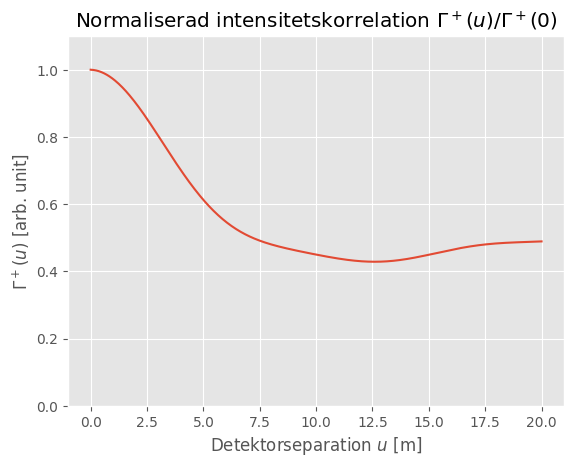

In [ ]:
plt.figure()
plt.plot(u.flatten(), gamma_I_norm)
plt.title(r'Normaliserad intensitetskorrelation $\Gamma^+(u)/\Gamma^+(0)$')
plt.xlabel('Detektorseparation $u$ [m]')
plt.ylabel(r'$\Gamma^+(u)$ [arb. unit]')
plt.grid(True)
plt.ylim([0, 1.1])
plt.show()